# IS 362 - Data Acquisiton and Management Project 2

Professor Charles Pak

Angela Hernandez

2/22/24


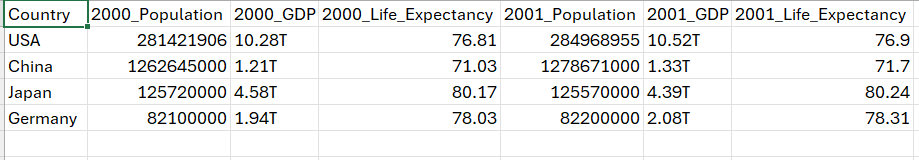

Your task is to:

(1) Choose any three of the “wide” datasets identified in the Week 5 Discussion items. (You may
use your own dataset; please don’t use my Sample Post dataset, since that was used in your
Project 1 assignment!) For each of the three chosen datasets:

    • Create a .CSV file (or optionally, a MySQL database!) that includes all of the information
    included in the dataset. You’re encouraged to use a “wide” structure similar to how the
    information appears in the discussion item, so that you can practice tidying and
    transformations as described below.
    • Read the information from your .CSV file into Python, and use pandas as needed to tidy
    and transform your data. [Most of your grade will be based on this step!]
    • Perform the analysis requested in the discussion item.
    • Your code should be in an Jupyter Notebook, posted to your GitHub repository, and
    should include narrative descriptions of your data cleanup work, analysis, and
    conclusions.

(2) Please include the URL for the Jupyter Notebook in your homework submission, for each of the
three chosen datasets. You may create a single Jupyter Notebook, or three separate
notebooks.

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
# Read the CSV file
df = pd.read_csv('C:/Users/Jessie/Documents/IS 362/country_data.csv')

In [132]:
# Display the data
print("Original DataFrame:")
print(df)

Original DataFrame:
   Country  2000_Population 2000_GDP  2000_Life_Expectancy  2001_Population  \
0      USA        281421906   10.28T                 76.81        284968955   
1    China       1262645000    1.21T                 71.03       1278671000   
2    Japan        125720000    4.58T                 80.17        125570000   
3  Germany         82100000    1.94T                 78.03         82200000   

  2001_GDP  2001_Life_Expectancy  
0   10.52T                 76.90  
1    1.33T                 71.70  
2    4.39T                 80.24  
3    2.08T                 78.31  


In [133]:
# Convert datafram into long format
df_tidy = pd.melt(df, id_vars='Country', var_name='Year_Info', value_name='Value')

In [134]:
# Display tidy dataframe
print("\nTidy DataFrame:")
print(df_tidy)


Tidy DataFrame:
    Country             Year_Info       Value
0       USA       2000_Population   281421906
1     China       2000_Population  1262645000
2     Japan       2000_Population   125720000
3   Germany       2000_Population    82100000
4       USA              2000_GDP      10.28T
5     China              2000_GDP       1.21T
6     Japan              2000_GDP       4.58T
7   Germany              2000_GDP       1.94T
8       USA  2000_Life_Expectancy       76.81
9     China  2000_Life_Expectancy       71.03
10    Japan  2000_Life_Expectancy       80.17
11  Germany  2000_Life_Expectancy       78.03
12      USA       2001_Population   284968955
13    China       2001_Population  1278671000
14    Japan       2001_Population   125570000
15  Germany       2001_Population    82200000
16      USA              2001_GDP      10.52T
17    China              2001_GDP       1.33T
18    Japan              2001_GDP       4.39T
19  Germany              2001_GDP       2.08T
20      USA  2001

In [135]:
# Perform the split operation
df_tidy[['Year', 'Metric']] = df_tidy['Year_Info'].str.split('_', n=1, expand=True)

In [136]:
# Drop the 'Year_Info' column as it's no longer needed
df_tidy = df_tidy.drop('Year_Info', axis=1)

In [137]:
# Convert GDP values to numeric
def convert_gdp_to_numeric(value):
    if isinstance(value, str) and 'T' in value:
        return float(value.replace('T', '')) * 1e12
    try:
        return float(value)
    except ValueError:
        return pd.NA

In [138]:
df_tidy['Value'] = df_tidy['Value'].apply(convert_gdp_to_numeric)

In [139]:
# Confirm 'Year' column is an integer
df_tidy['Year'] = df_tidy['Year'].astype(int)

In [140]:
print("\nTidy DataFrame:")
print(df_tidy)


Tidy DataFrame:
    Country         Value  Year           Metric
0       USA  2.814219e+08  2000       Population
1     China  1.262645e+09  2000       Population
2     Japan  1.257200e+08  2000       Population
3   Germany  8.210000e+07  2000       Population
4       USA  1.028000e+13  2000              GDP
5     China  1.210000e+12  2000              GDP
6     Japan  4.580000e+12  2000              GDP
7   Germany  1.940000e+12  2000              GDP
8       USA  7.681000e+01  2000  Life_Expectancy
9     China  7.103000e+01  2000  Life_Expectancy
10    Japan  8.017000e+01  2000  Life_Expectancy
11  Germany  7.803000e+01  2000  Life_Expectancy
12      USA  2.849690e+08  2001       Population
13    China  1.278671e+09  2001       Population
14    Japan  1.255700e+08  2001       Population
15  Germany  8.220000e+07  2001       Population
16      USA  1.052000e+13  2001              GDP
17    China  1.330000e+12  2001              GDP
18    Japan  4.390000e+12  2001              GDP
19 

In [141]:
# Pivot the table
df_pivot = df_tidy.pivot_table(index=['Country', 'Year'], columns='Metric', values='Value', aggfunc='first').reset_index()

In [142]:
# Convert 'Year' to numeric for analysis
df_pivot['Year'] = pd.to_numeric(df_pivot['Year'])

In [143]:
# Calculate growth rates for each metric from 2000 to 2001
growth_rates = df_pivot.pivot_table(index='Country', columns='Year').pct_change(axis='columns').dropna(axis=1, how='all')

In [144]:
# Plot the trends
growth_rates.columns = growth_rates.columns.droplevel(0)
growth_rates = growth_rates.reset_index()
growth_rates.columns.name = None

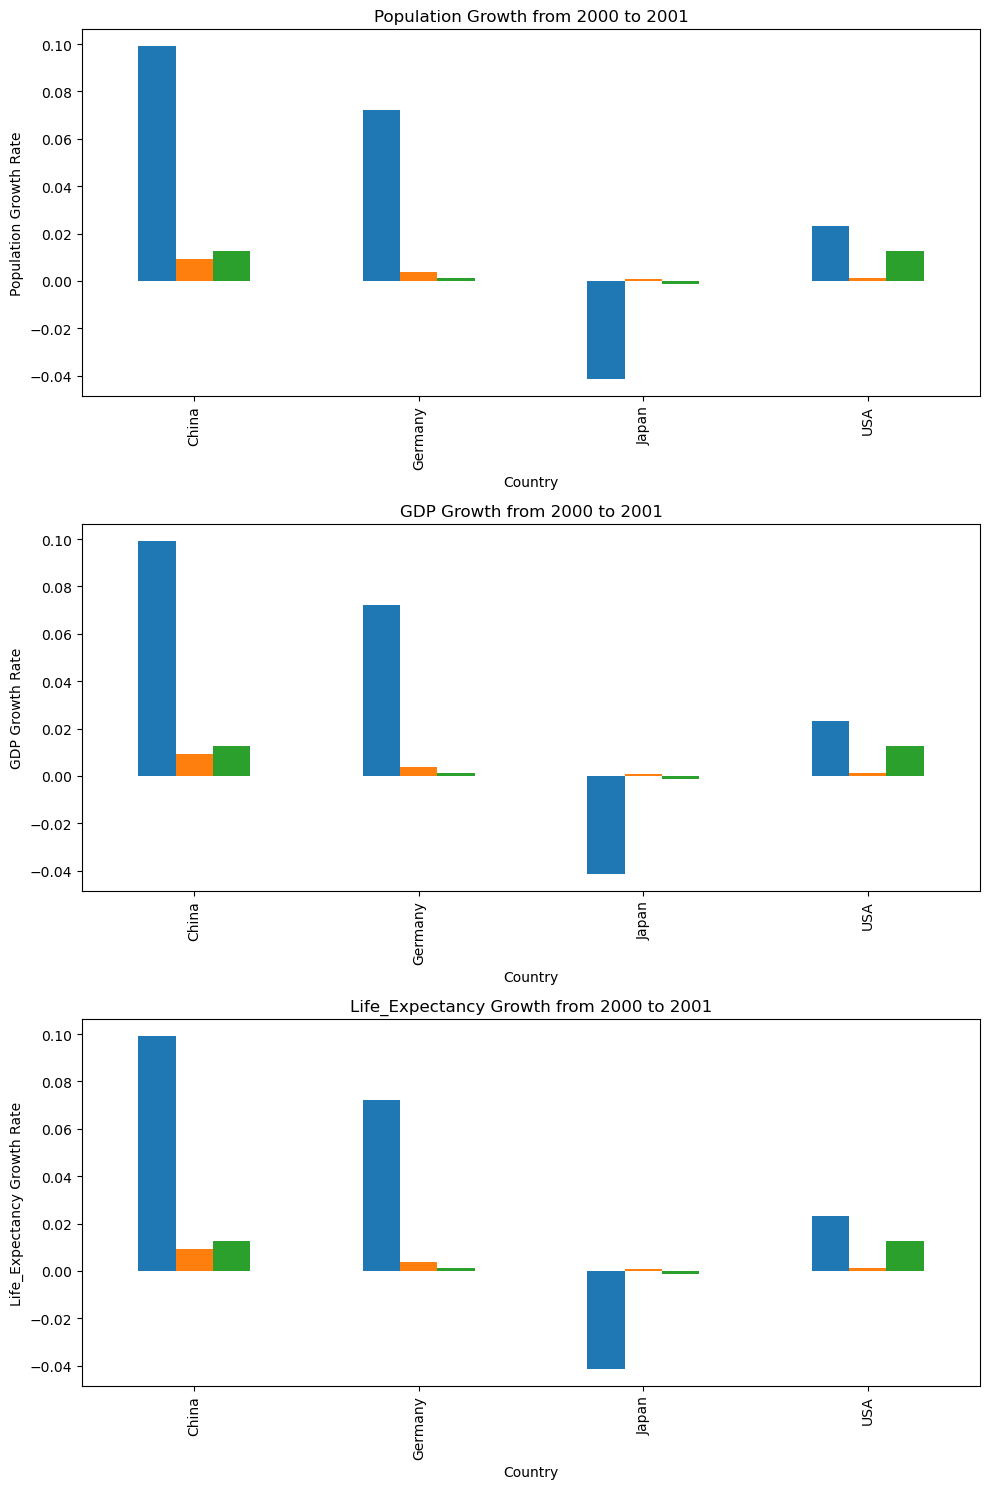

In [147]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
metrics = ['Population', 'GDP', 'Life_Expectancy']
for i, metric in enumerate(metrics):
    growth_rates.plot(x='Country', y=2001, kind='bar', ax=axes[i], legend=False)
    axes[i].set_ylabel(f'{metric} Growth Rate')
    axes[i].set_title(f'{metric} Growth from 2000 to 2001')
    
plt.tight_layout()
plt.show()

# Conclusion

Based on the plots, China and Germany highest growth in population, gdp and life expectancy in 2001.  Japan experienced a decline and then minial growth before declining again.  The US saw some growth, significant decline and then growth again in all 3 categories.